In [385]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()
import warnings
warnings.filterwarnings("ignore")


* The task is to perform the logistic linear regression on algerian forest fire dataset perform:-
   * perform logistic regression on imbalanced dataset
   * perform logistic regression and get the 90 or above percent accuracy

In [386]:
## logistic regression for algerian forest fire imbalanced dataset

In [387]:
df=pd.read_csv("C:\\Users\\shekh\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [388]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [389]:
#we need to drop rows which are mentioning regions as they are not useful to us bejaia and sidi-bel
df.drop([122,123], inplace=True)
df.reset_index(inplace=True)

In [390]:
df.drop('index',axis=1,inplace=True)

In [391]:
#now we have to metion the region respective to there rows
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1


In [392]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


## Exploring and cleaning the data

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [394]:
#checking for the na values
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

### Features in the dataset
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire



In [395]:
df.columns=df.columns.str.strip() #this will remove the uneccessary spaces in the columns

In [396]:
df.Classes=df.Classes.str.strip()

In [397]:
df['FWI']=df['FWI'].replace('fire   ', '')

In [398]:
df['FWI']=df['FWI'].replace(r'^\s*$',np.nan, regex=True)

In [399]:
df['DC']=df['DC'].replace('14.6 9', '14.69')

In [400]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)
df[['BUI', 'Rain','FFMC', 'DMC','ISI','FWI','DC']]=df[['BUI', 'Rain','FFMC', 'DMC','ISI','FWI','DC']].astype(float)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int32(3), object(4)
memory usage: 25.9+ KB


In [402]:
df[df['Classes'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,NaN,1.0


In [403]:
modeValue=df['Classes'].mode() #handlin the missing value

In [404]:
df['Classes'].fillna(value=modeValue[0], inplace=True)

In [405]:
df[df['Classes'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [406]:
df[df['FWI'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,fire,1.0


In [407]:
df['FWI'].fillna(df['FWI'].median(), inplace=True)

In [408]:
df[df['FWI'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [409]:
df.isnull().sum().sum()

0

In [410]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
FWI,244.0,7.023770,7.427460,0.0,0.700,4.20,11.375,31.1


In [411]:
cat_fea=[fea for fea in df.columns if df[fea].dtype=='O']
num_fea=[fea for fea in df.columns if df[fea].dtype!='O']
print(f'numeric features are :{num_fea} \n categorical features are : {cat_fea}')

numeric features are :['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region'] 
 categorical features are : ['day', 'month', 'year', 'Classes']


### Graphical analysis

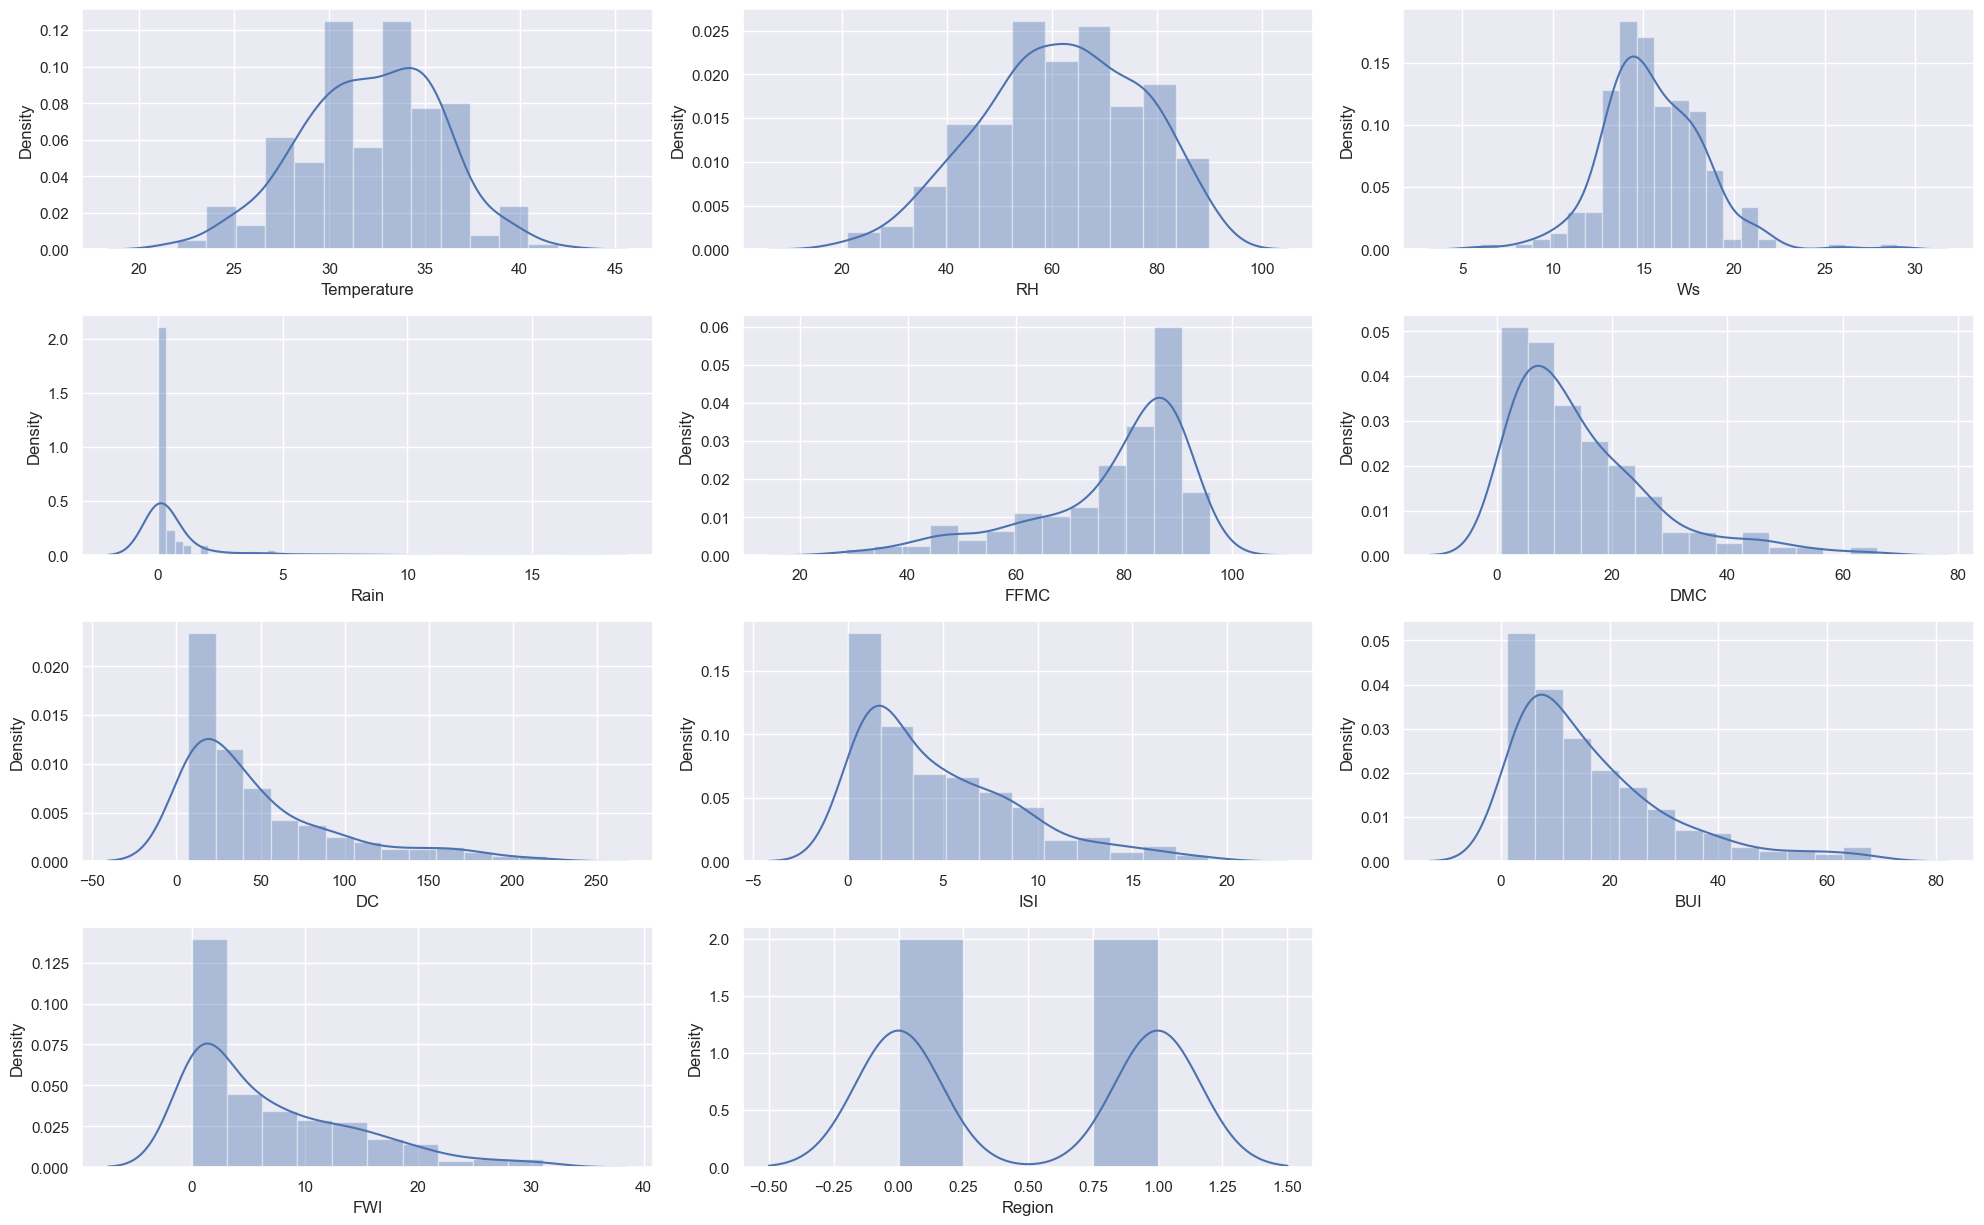

In [412]:
plt.figure(figsize=(20,15))
plot=1

for i in df[num_fea]:
    if plot<=11:
        plt.subplot(5,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1
plt.tight_layout()
plt.show()

* We can draw following conclusion from above distribution plot:-
    * Temperature is little bit skewed is and about to be symmetric
    * RH, Ws is also little skewed 
    * Rain is right skewed  with outliers present
    * FFMC is left skewed with outlier present
    * DMC, DC, ISI, BUI, FWI are right skewed with outliers present in them
    

## checking the correaltion

In [413]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.858065,0.087370
FWI,0.562344,-0.574773,0.030910,-0.323831,0.688876,0.875791,0.739634,0.913163,0.858065,1.000000,0.195070


<AxesSubplot: >

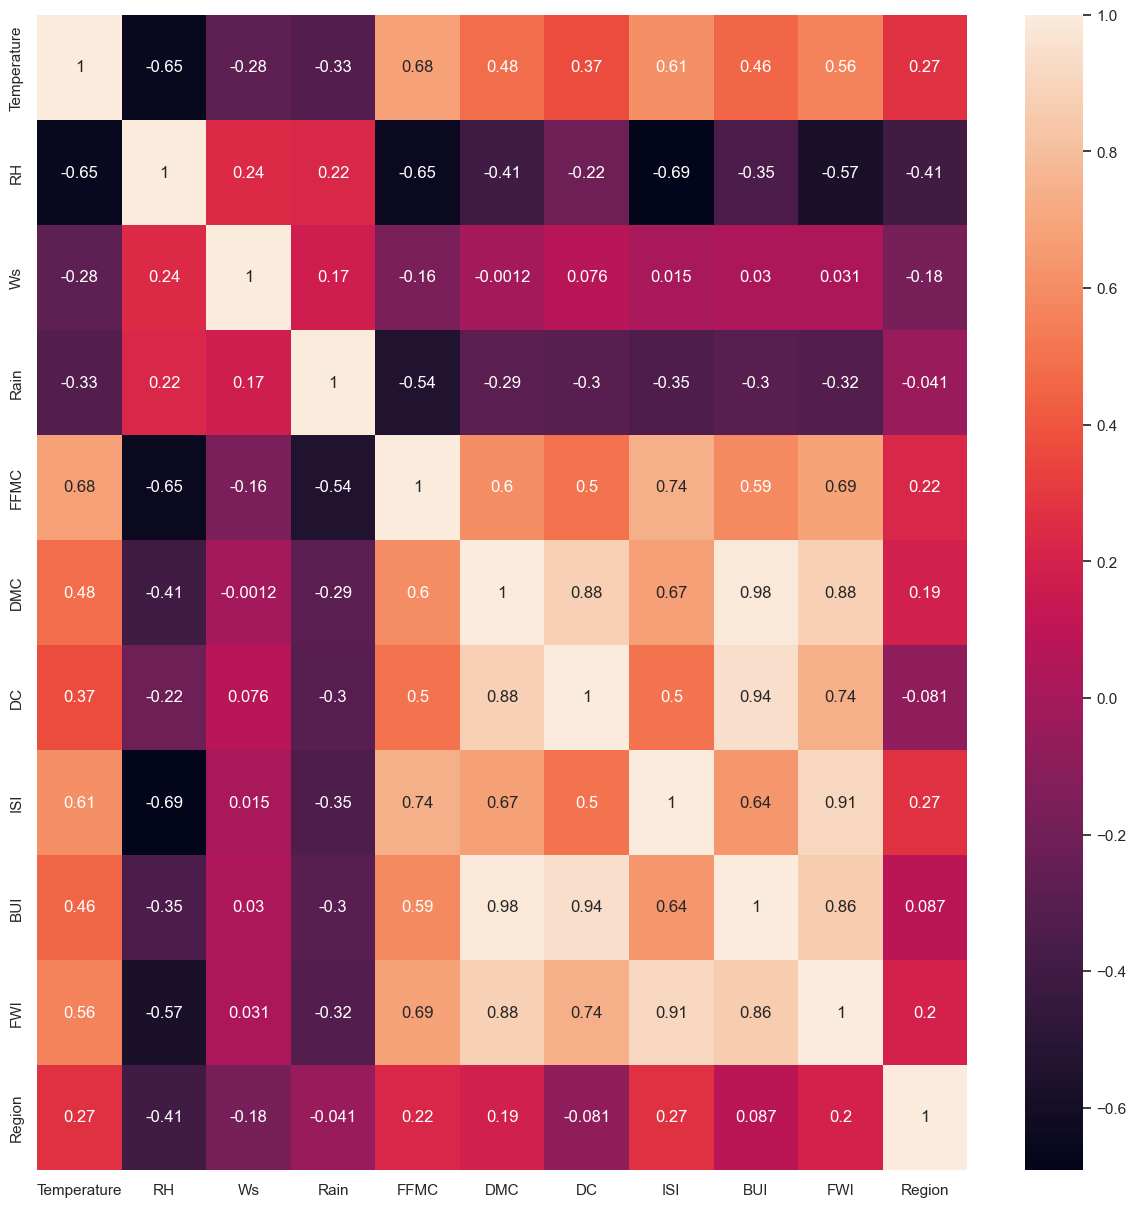

In [414]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

* As our output feature is Categorical columns which is in binary we cannot draw conclusion for taget from above graph
* we can only see positive and negative correlation between the features

* As our target is Classes we compare it with every numeric feature

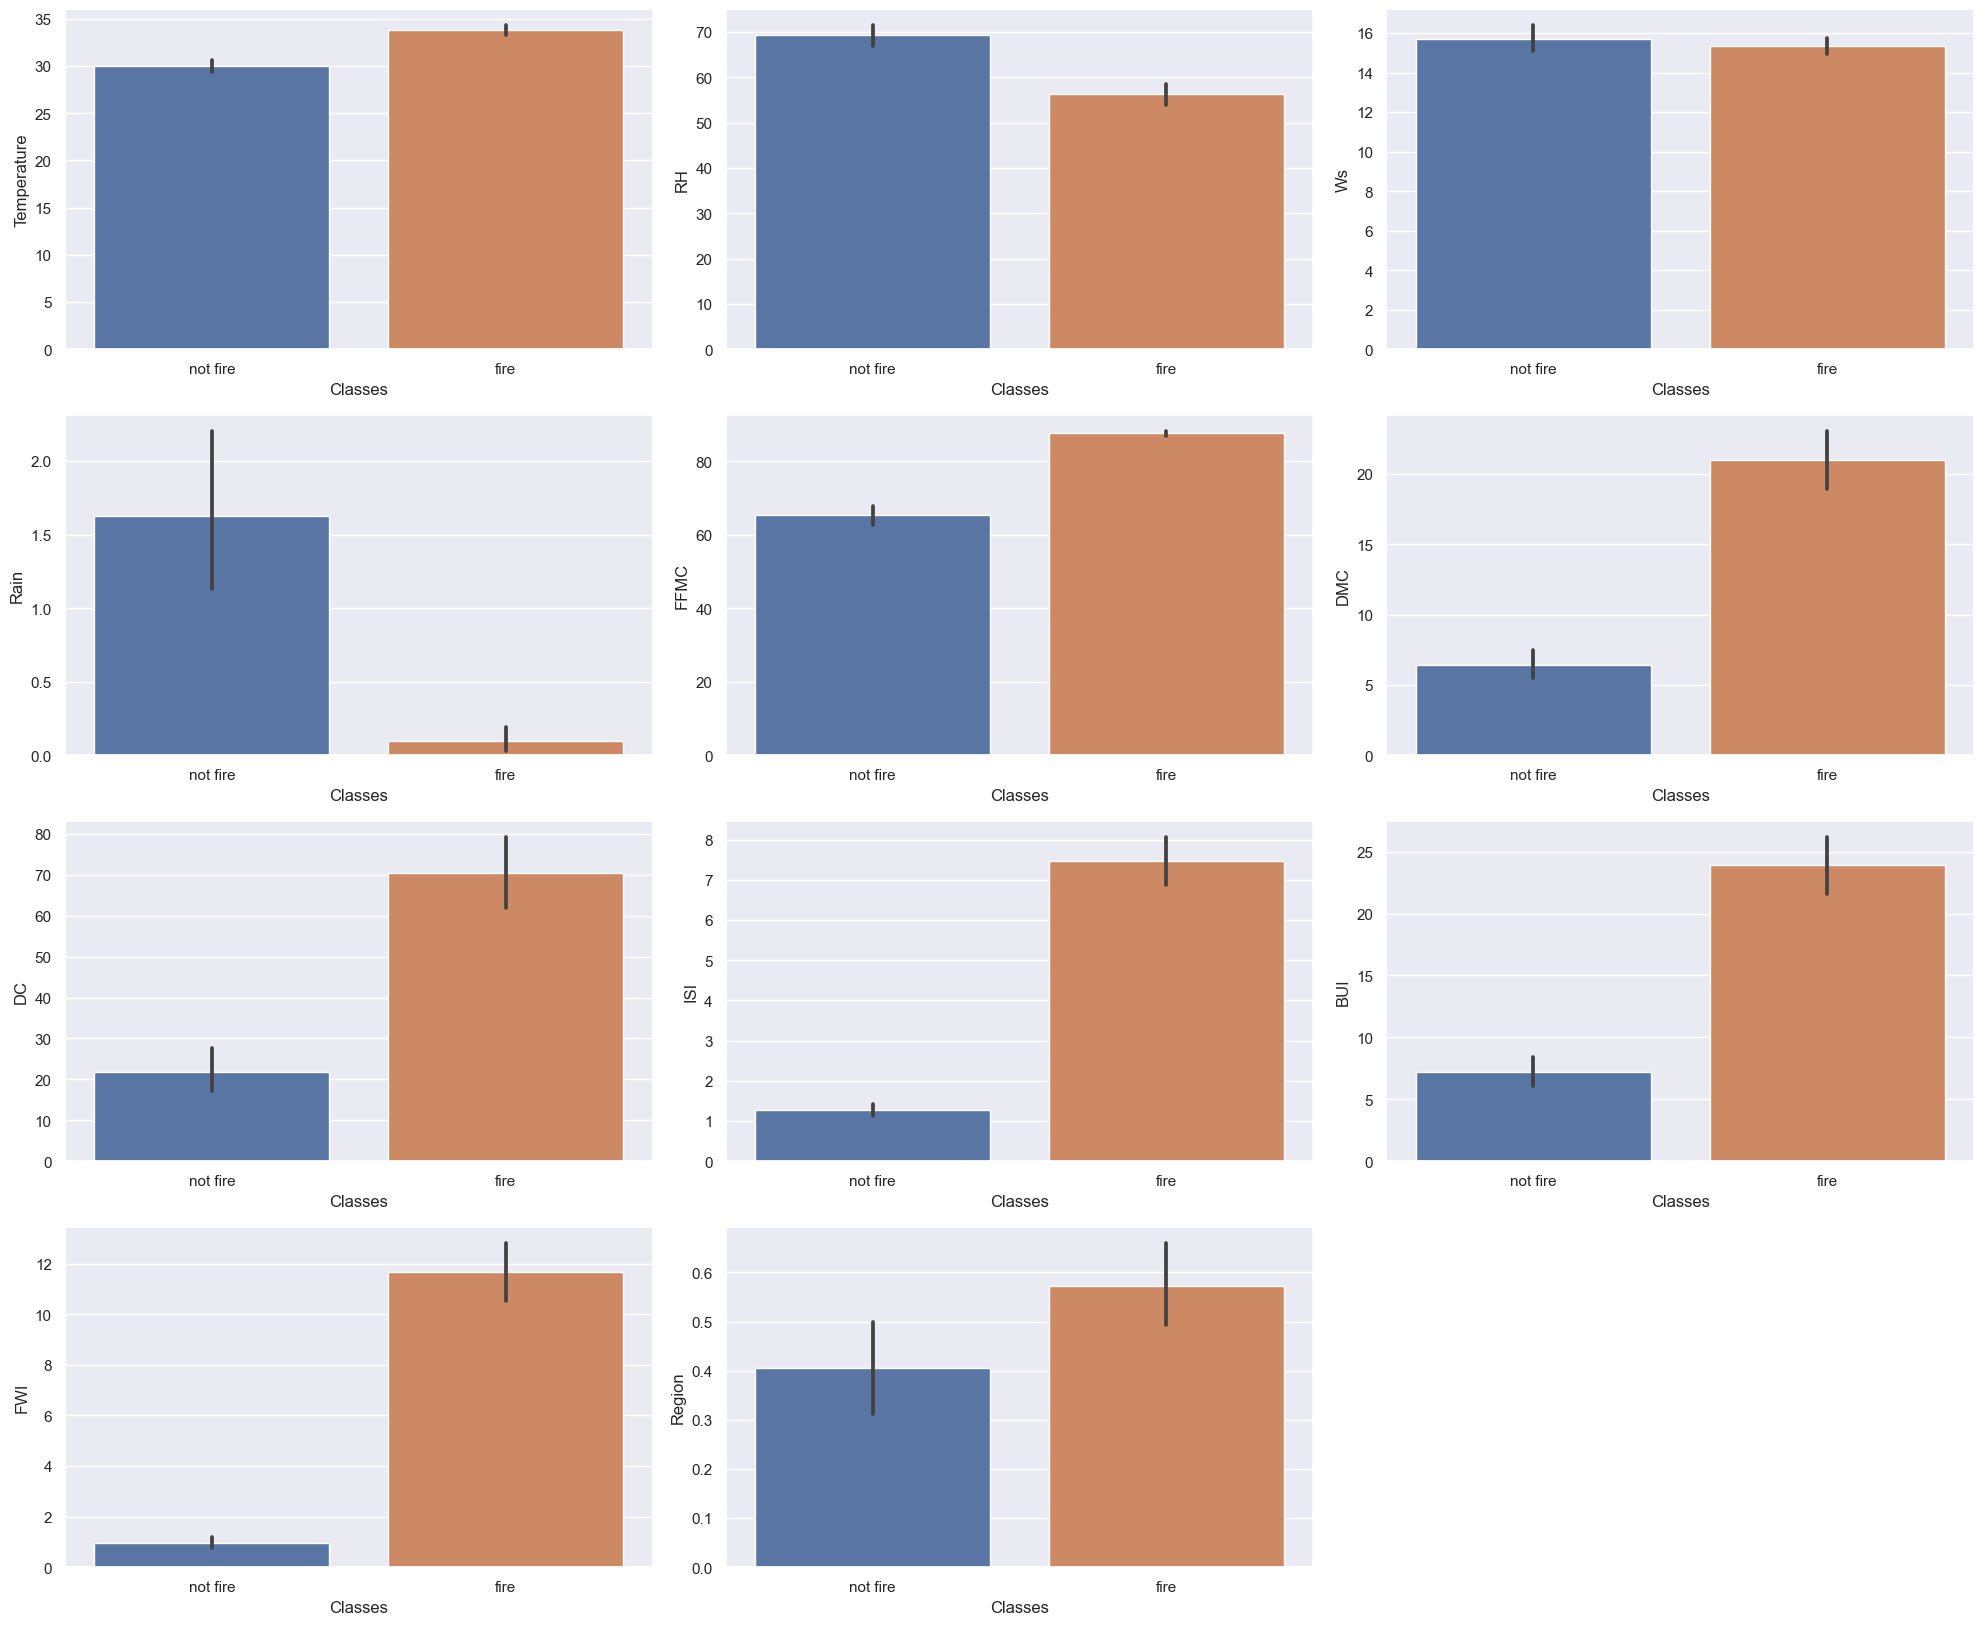

In [415]:
plt.figure(figsize=(20,20))
for i in range(0, len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.barplot(x=df['Classes'], y=num_fea[i], data=df)
    plt.tight_layout()

In [416]:

# fig, ax = plt.subplots(figsize=(15,10))
plt.figure(figsize=(10,10))
sns.boxplot(data=data, width= 0.5,  fliersize=3)
plt.xticks(rotation=90)
pplt.show()


NameError: name 'data' is not defined

<Figure size 1000x1000 with 0 Axes>

* we can see the outliers in the features which are causing the skewness in the features

***As we know that the rise in temperature increases the chances of causing the fire so we will plot the graph of temperaturer vs Fire***

<AxesSubplot: xlabel='Temperature', ylabel='Count'>

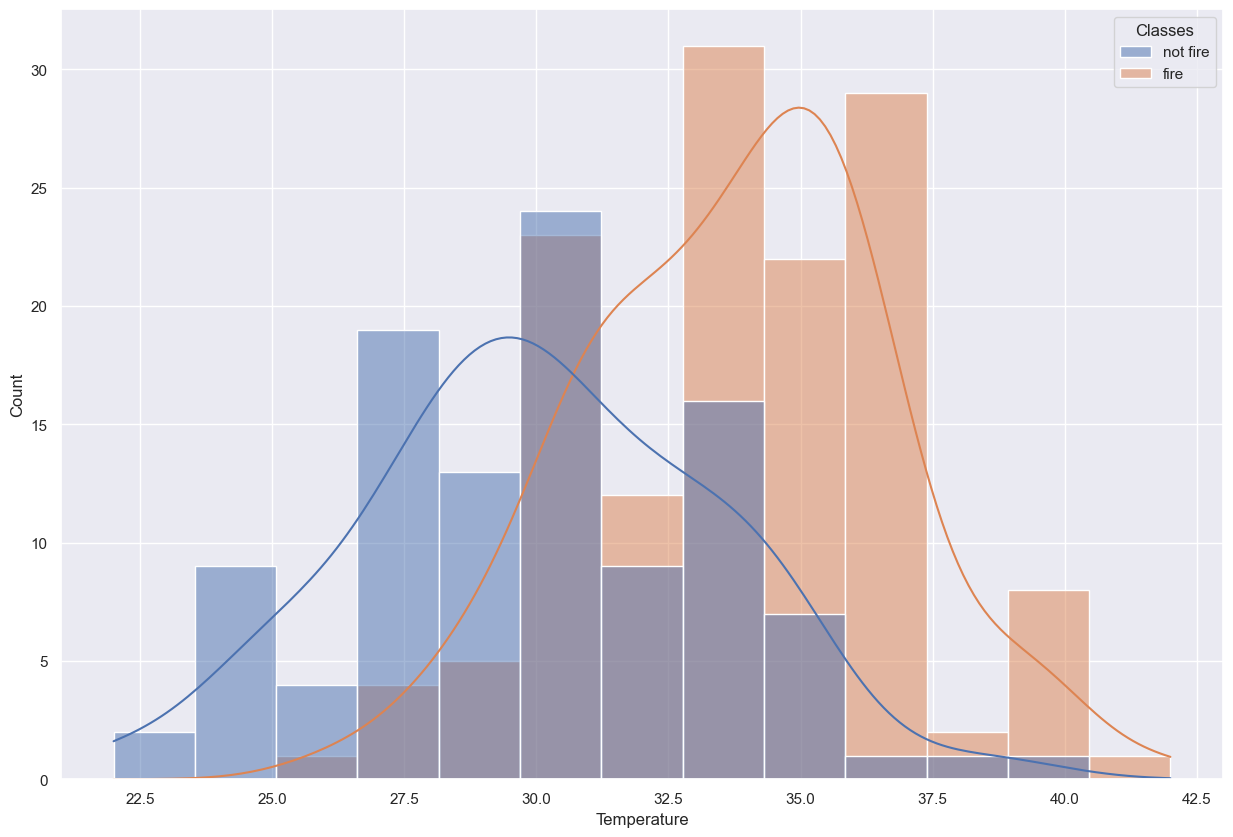

In [417]:
relation=['Temperature', 'Classes']
relation_df=df[relation]
plt.figure(figsize=(15,10))

sns.histplot(data=df, x=df['Temperature'], hue='Classes', kde=True)

* As we can see that rise in temperature can cause the fire , as we can deduce from the graph that extreme temperature is few but it causes fire and lower temperature has minimal chance of fire

In [477]:
a=df[num_fea]
b=df['Classes']

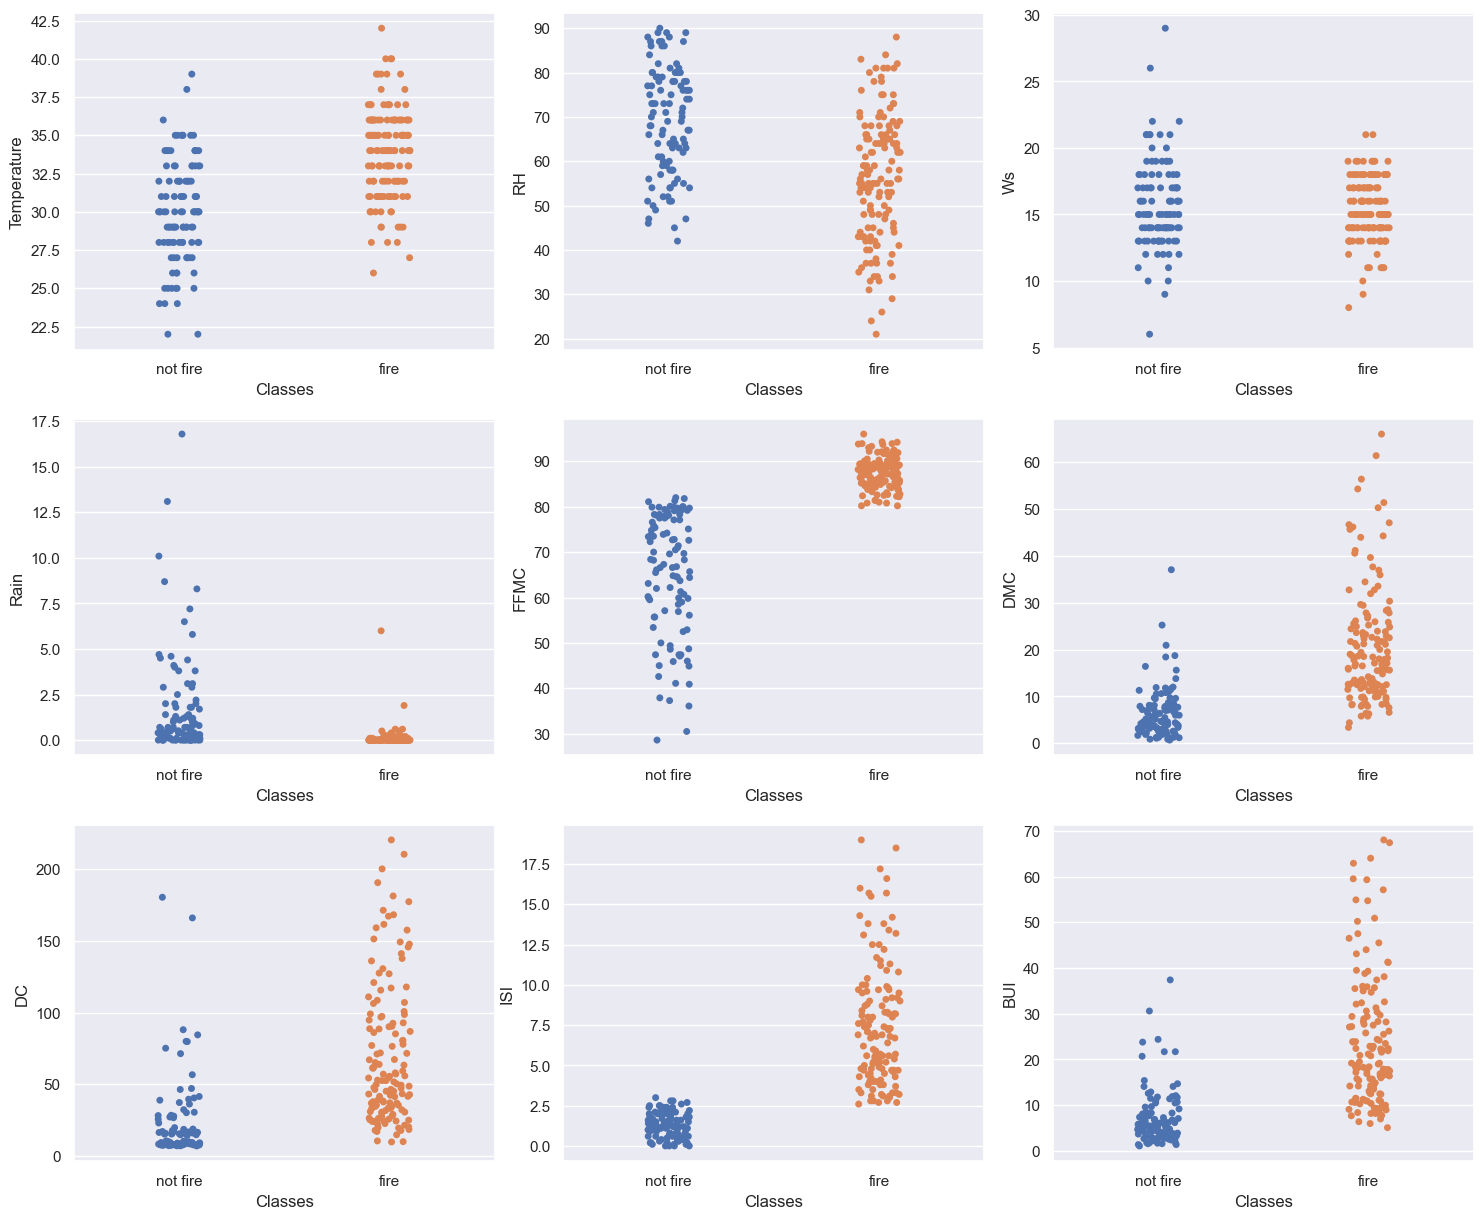

In [481]:
plt.figure(figsize=(15,20))
pltno=1

for i in a:
    if pltno<=9 :
        plt.subplot(5,3,pltno)
        sns.stripplot(y,x[i])
    pltno+=1
plt.tight_layout()

<AxesSubplot: xlabel='Rain', ylabel='Temperature'>

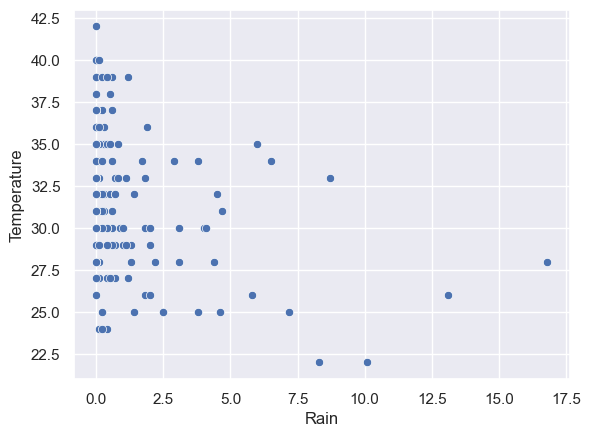

In [418]:
sns.scatterplot(df.Rain, df.Temperature)

* As we can see from the above that more the temperature less frequent or no rainfall there will be

# TAKING OUT DEPENDENT AND INDEPENDENT FEATURES FROM DATA

In [486]:
x=df.iloc[:,3:13]
y=df['Classes']

In [488]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [489]:
y.head()

0    not fire
1    not fire
2    not fire
3    not fire
4    not fire
Name: Classes, dtype: object

* we have taken out the output feature Classes(dependent feature) in y variable andin x variable we have taken out independent variables

#### lets perform train test split

In [490]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [493]:
x_train.shape, x_test.shape

((163, 10), (81, 10))

In [495]:
y_train.shape, y_test.shape

((163,), (81,))

In [491]:
log_reg=LogisticRegression()

In [496]:
log_reg.fit(x_train,y_train)

LogisticRegression()

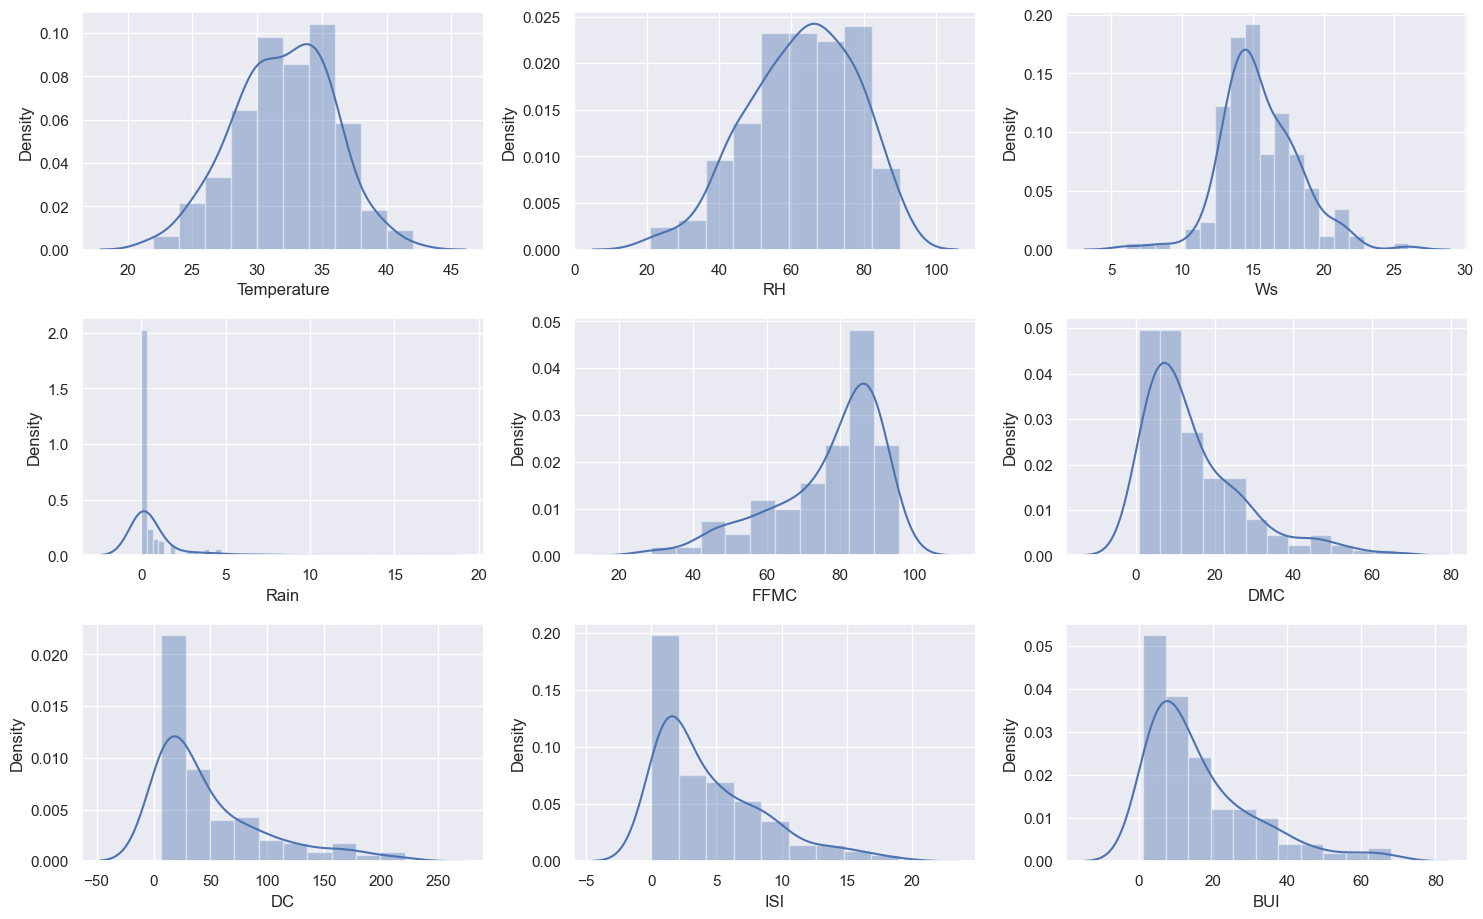

In [517]:
plt.figure(figsize=(15,15))
plotnum=1
for i in x_train.columns:
    if plotnum<=9:
        plt.subplot(5,3,plotnum)
        sns.distplot(x_train[i])
    plotnum+=1
plt.tight_layout()
    
    

In [497]:
#coefficient 
log_reg.coef_

array([[ 0.27227619,  0.02608916,  0.29302811, -0.31879481, -0.10657568,
         0.33693738, -0.02168163, -1.27807551,  0.04585947, -1.83736752]])

In [499]:
#intercept
log_reg.intercept_

array([0.12740692])

In [500]:
predict=log_reg.predict(x_test)

In [501]:
predict

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire'],
      dtype=object)

In [503]:
compare=pd.DataFrame({'ACTUAL':y_test , 'PREDICTED':predict})
compare.tail(30)

,ACTUAL,PREDICTED
96,fire,not fire
167,fire,fire
84,fire,fire
55,fire,fire
86,fire,fire
172,fire,fire
242,not fire,not fire
152,not fire,not fire
231,fire,fire
155,fire,fire


* we Can see that the most of the  values are matching  not all

In [504]:
#lets create the confusion matrix
conf_mat=confusion_matrix(y_test,predict)

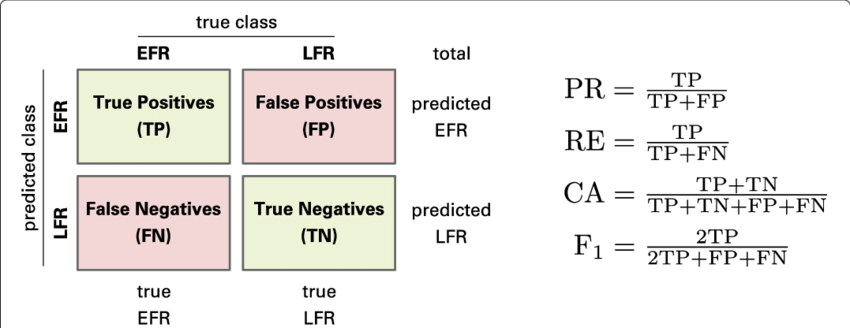

In [505]:
conf_mat

array([[52,  1],
       [ 0, 28]], dtype=int64)

In [506]:
True_positive=conf_mat[0][0]
False_positive=conf_mat[0][1]
False_negative=conf_mat[1][1]
True_negative=conf_mat[1][0]

## ACCURACY CALCULATION
* Accuracy is a commonly used evaluation metric for classification models, including logistic regression. It is defined as the proportion of correct predictions made by the model out of all predictions made.



In [507]:
accuracy=accuracy_score(y_test, predict)
accuracy

0.9876543209876543

## precision

In [509]:
precision=True_positive/(True_positive+False_positive)
precision

0.9811320754716981

## Recall

In [510]:
recall=True_positive/(True_positive+False_negative)
recall

0.65

## F-1 score

In [511]:
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.781954887218045